<a href="https://colab.research.google.com/github/StoneAustin/Biomass-Scaling/blob/main/Preparing_Biomass_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Biomass Data for Biomass Prediciton on Raster Data

In this noteboook, we will take the biomass data collected by the USDA ARS in Tifton and prepare it for prediction over a raster surface.

Step 1: Read the Excel Spreadsheet and understand what data is included.

Step 2: Clean data to only relevant information.

Step 3: Add columns 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis Files/Tifton_JECAM_Biomass_2018_REV.xlsx'
df = pd.read_excel(file_path, sheet_name = ['Metadata','Tifton_JECAM_Biomass_2018_REV'])

In [15]:
# Using Pandas we will read in our Excel Spreadsheet
# Since we know the sheet names in the file, we can go ahead and list them
# If you do not know the sheet names you can replace with "sheet_name = None"
#df = pd.read_excel('F:\Thesis Work\Tables\Tifton_JECAM_Biomass_2018_REV.xlsx', sheet_name = ['Metadata','Tifton_JECAM_Biomass_2018_REV'])

In [16]:
# We already know the column names, but in case you do not you can use the keys function to identify them
df.keys()

dict_keys(['Metadata', 'Tifton_JECAM_Biomass_2018_REV'])

In [17]:
# Show the contents of the 'Metadata' sheet
# This is useful because now we can understand what each column represents
df['Metadata']

,Column,Variable Name,Description
0,1,Date,Date of observation (year and day of year -- y...
1,2,Idkey,Unique identifier of farm and sample point; jo...
2,3,Field_Id,Unique field identifier
3,4,Site_ID,Unique site identifier
4,5,WetWeight_G,Wet weight of sample (tared; grams)
5,6,DryWeight_G,Dry weight of sample (tared; grams)
6,7,BagWeight_G,Bag weight (grams)
7,8,PWC,Plant water content (grams; wet weight - dry w...
8,9,PD_m2,Plant density: Pspace/RowSpace_mx10m
9,10,AreaPWC_g_m2,Area plant water content (grams/m2; PWC/10 * P...


In [18]:
# Show the contents of the 'Tifton_JECAM_Biomass_2018_REV' sheet
df['Tifton_JECAM_Biomass_2018_REV']

,Date,Idkey,Field_Id,Site_ID,DryWeight_G,WetWeight_G,BagWeight_G,PWC,PD_m2,PWC_g_m2,PWC_PCT,Notes
0,2018169,102,1100,2,60.39,136.07,48.29,27.39,6.444201,17.650667,68.796992,Wet weights not tared. PWC value accounts for ...
1,2018169,114,1100,14,70.67,200.80,49.32,80.81,4.923414,39.786105,46.653024,Wet weights not tared. PWC value accounts for ...
2,2018169,128,1100,28,59.87,128.60,46.75,21.98,5.853392,12.865755,73.145999,Wet weights not tared. PWC value accounts for ...
3,2018169,120,1102,20,53.75,110.35,50.15,6.45,6.487965,4.184737,89.285714,Wet weights not tared. PWC value accounts for ...
4,2018169,132,1102,32,63.07,139.97,48.65,28.25,6.061269,17.123085,69.064827,Wet weights not tared. PWC value accounts for ...
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2018288,228,2,28,NaN,NaN,NaN,NaN,,NaN,,Alisa weighed wet samples: Samples were due t...
86,2018288,243,2,43,NaN,NaN,NaN,NaN,,NaN,,Alisa weighed wet samples: Samples were due t...
87,2018288,247,3,47,NaN,NaN,NaN,NaN,,NaN,,Alisa weighed wet samples: Samples were due t...
88,2018288,250,3,50,1243.00,2658.00,NaN,1415,7.166302,1014.031729,46.764485,Alisa weighed wet samples. Coby weighed dry s...


In [19]:
# This dataset contains biomass data from two seperate fields
# We only want to include data from the field whose "Idkey" column starts with "1"

temp = df['Tifton_JECAM_Biomass_2018_REV']
field1_bm = temp.loc[temp['Idkey'] <= 200]
field1_bm.head()

,Date,Idkey,Field_Id,Site_ID,DryWeight_G,WetWeight_G,BagWeight_G,PWC,PD_m2,PWC_g_m2,PWC_PCT,Notes
0,2018169,102,1100,2,60.39,136.07,48.29,27.39,6.444201,17.650667,68.796992,Wet weights not tared. PWC value accounts for ...
1,2018169,114,1100,14,70.67,200.80,49.32,80.81,4.923414,39.786105,46.653024,Wet weights not tared. PWC value accounts for ...
2,2018169,128,1100,28,59.87,128.60,46.75,21.98,5.853392,12.865755,73.145999,Wet weights not tared. PWC value accounts for ...
3,2018169,120,1102,20,53.75,110.35,50.15,6.45,6.487965,4.184737,89.285714,Wet weights not tared. PWC value accounts for ...
4,2018169,132,1102,32,63.07,139.97,48.65,28.25,6.061269,17.123085,69.064827,Wet weights not tared. PWC value accounts for ...


In [ ]:
# Now I want to clean up the dates and pivot this table to show each sample plot over time

import datetime

field1_bm['Datetime'] = field1_bm['Date'].astype(str).str.slice(start=4, stop=8)
field1_bm ['Datetime'] = pd.to_datetime(field1_bm['Datetime'], format='%j')
field1_bm ['Datetime'] = field1_bm['Datetime'].apply(lambda x: x.replace(year=2018))
field1_bm.head()

In [21]:
#Creating a Pivot Table so that way I can visualize the data better and create visualizations
pivot_table1 = pd.pivot_table(field1_bm, values=['DryWeight_G','WetWeight_G','PWC','PD_m2','PWC_g_m2','PWC_PCT'],index='Datetime', columns="Idkey", aggfunc='sum')
pivot_table1

<ipython-input-21-dd5021153bca>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table1 = pd.pivot_table(field1_bm, values=['DryWeight_G','WetWeight_G','PWC','PD_m2','PWC_g_m2','PWC_PCT'],index='Datetime', columns="Idkey", aggfunc='sum')


DryWeight_G                                               \
Idkey              102      114      120      128      132      139   
Datetime                                                              
2018-06-18       60.39    70.67    53.75    59.87    63.07    60.53   
2018-07-12      607.00   737.00   518.00   601.00   597.00   591.00   
2018-08-03      876.00   925.00   598.00   743.00   783.00   815.00   
2018-08-31     1373.00  1842.00  1527.00  1139.00  1505.00  1272.00   
2018-09-21     1305.00  1359.00  1617.00  1605.00  1027.00  2351.00   
2018-10-17     1293.00  1199.00  1208.00  1166.00  1061.00  1577.00   

           WetWeight_G                                             
Idkey              102     114      120     128      132      139  
Datetime                                                           
2018-06-18      136.07   200.8   110.35   128.6   139.97   137.47  
2018-07-12     1791.00  2276.0  1003.00  1697.0  1795.00  1698.00  
2018-08-03     4641.00  4416.0  3010.00  3574.0  3533.00  3975.00  
2018-08-31     6232.00  6760.0  5965.00  4616.0  5806.00  5140.00  
2018-09-21     4244.00  3689.0  4313.00  4737.0  3358.00  6445.00  
2018-10-17     2640.00  2419.0  2432.00  2102.0  1574.00  3080.00

In [23]:
pivot_table2 = pd.pivot_table(field1_bm, values=['PWC','PD_m2'], index='Datetime', columns="Idkey", aggfunc='sum')
pivot_table2

PD_m2                                                    \
Idkey            102       114       120       128       132       139   
Datetime                                                                 
2018-06-18  6.444201  4.923414  6.487965  5.853392  6.061269  5.371991   
2018-07-12  6.444201  4.923414  6.487965  5.853392  6.061269  5.371991   
2018-08-03  6.444201  4.923414  5.853392  6.487965  6.061269  5.371991   
2018-08-31  6.444201  4.923414  5.853392  6.487965  6.061269  5.371991   
2018-09-21  6.444201  4.923414  5.853392  6.487965  6.061269  5.371991   
2018-10-17  6.444201  4.923414  5.853392  6.487965  6.061269  5.371991   

                PWC                                               
Idkey           102      114      120      128      132      139  
Datetime                                                          
2018-06-18    27.39    80.81     6.45    21.98    28.25    26.77  
2018-07-12   865.00  1220.00   166.00   777.00   879.00   788.00  
2018-08-03  3765.00  3491.00  2412.00  2831.00  2750.00  3160.00  
2018-08-31  4859.00  4918.00  4438.00  3477.00  4301.00  3868.00  
2018-09-21  2939.00  2330.00  2696.00  3132.00  2331.00  4094.00  
2018-10-17  1347.00  1220.00  1224.00   936.00   513.00  1503.00

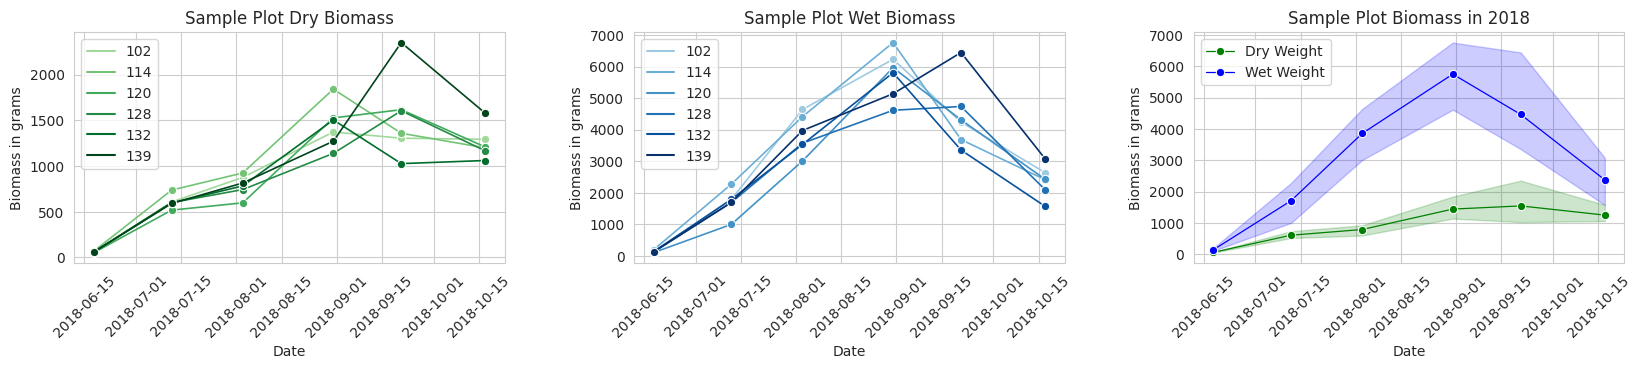

In [121]:
# plot each row as a line using seaborn with markers and smooth lines
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 3))

sns.set_style("whitegrid")
dark_green_palette = sns.color_palette(['#a1d99b','#74c476','#41ab5d','#238b45','#006d2c','#00441b'])
dark_blue_palette = sns.color_palette(['#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b'])

# plot mean values for each column
sns.lineplot(data=pivot_table1['DryWeight_G'], palette=dark_green_palette,dashes=False, marker='o', linewidth=1.2, ax=ax1)
sns.lineplot(data=pivot_table1['WetWeight_G'], palette=dark_blue_palette, dashes=False, marker='o', linewidth=1.2, ax=ax2)


sns.lineplot(x=pivot_table1.index, y=pivot_table1['DryWeight_G'].mean(axis=1), data=pivot_table1, dashes=True, marker='o', linewidth=.9, label='Dry Weight', ax=ax3, color='green')
sns.lineplot(x=pivot_table1.index, y=pivot_table1['WetWeight_G'].mean(axis=1), data=pivot_table1, dashes=True, marker='o', linewidth=.9, label='Wet Weight', ax=ax3, color='blue')

# plot envelope using min and max values for each column
ax3.fill_between(pivot_table1.index, pivot_table1['DryWeight_G'].min(axis=1), pivot_table1['DryWeight_G'].max(axis=1), alpha=0.2, color='green')
ax3.fill_between(pivot_table1.index, pivot_table1['WetWeight_G'].min(axis=1), pivot_table1['WetWeight_G'].max(axis=1), alpha=0.2, color='blue')

# set the plot titles and axis labels
ax1.set_title("Sample Plot Dry Biomass")
ax1.set_xlabel("Date")
ax1.set_ylabel("Biomass in grams")

ax2.set_title("Sample Plot Wet Biomass")
ax2.set_xlabel("Date")
ax2.set_ylabel("Biomass in grams")

ax3.set_title("Sample Plot Biomass in 2018")
ax3.set_xlabel("Date")
ax3.set_ylabel("Biomass in grams")

# rotate the x-axis labels at 45 degrees
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

# add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

#adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

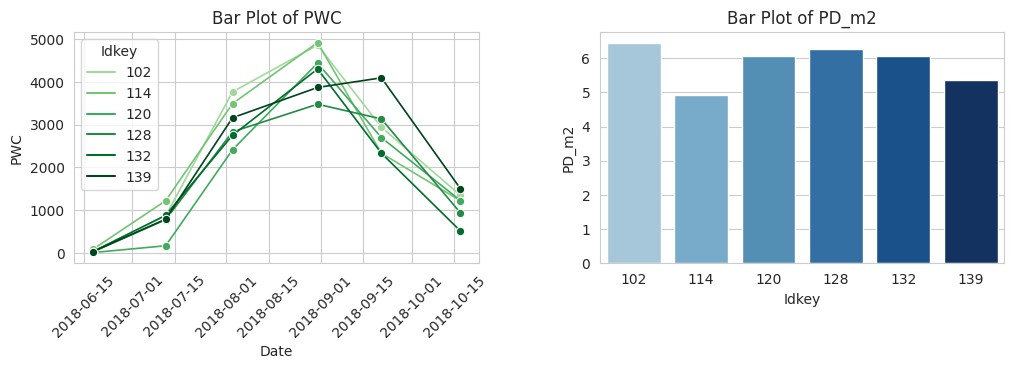

In [122]:

#create two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

#plot the first bar chart
sns.lineplot(data=pivot_table2['PWC'], palette=dark_green_palette,dashes=False, marker='o', linewidth=1.2,ax=ax1)
ax1.set_title("Plant Water Content")
ax1.set_xlabel("Date")
ax1.set_ylabel("PWC")

#plot the second bar chart
sns.barplot(data=pivot_table2['PD_m2'], palette=dark_blue_palette, errorbar = None, ax=ax2)
ax2.set_title("Bar Plot of PD_m2")
ax2.set_xlabel("Idkey")
ax2.set_ylabel("PD_m2")


ax1.tick_params(axis='x', rotation=45)

#adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# show the plot
plt.show()